In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') 
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [11]:
train = pd.read_csv("./train_maxmin.csv")
test = pd.read_csv("./test_maxmin.csv")
train_id = train["train_id"]
target = train["dbh"]
train = train.drop(["dbh","train_id"],axis=1)
test_id = test["test_id"]
test = test.drop(["test_id"],axis=1)
print(train.describe())

            max_h       min_h      mean_h        sd_h         sum_h  \
count  100.000000  100.000000  100.000000  100.000000    100.000000   
mean    31.256400   13.551000   25.116951    4.080438   3434.404894   
std      6.669115    7.094876    6.062526    1.764470   2177.420502   
min     21.010000    5.100000   14.525690    0.520348    243.139998   
25%     25.505000    8.372500   20.403993    2.917439   1873.557498   
50%     30.705000   11.980000   23.497401    3.866057   3170.640000   
75%     35.872500   16.355000   29.329508    5.200860   4608.217491   
max     47.230000   38.259998   40.867333    9.411008  11451.179980   

       crown_area  crown_perim      maxmin  
count   100.00000   100.000000  100.000000  
mean     22.13120    25.992000   17.705400  
std      12.88846     9.234451    7.923928  
min       2.08000     1.600000    1.760002  
25%      12.28000    20.800000   12.307500  
50%      20.16000    26.400000   17.215000  
75%      29.48000    32.800000   23.142501  


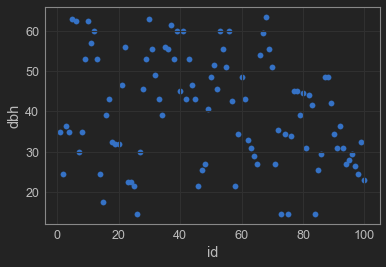

In [12]:
import matplotlib.pyplot as plt
x = train_id
y = target
plt.scatter(x,y)
plt.xlabel("id")
plt.ylabel("dbh")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean

kf = KFold(n_splits=100,random_state=0)
rmse = []
pred = []

for X_index, Y_index in kf.split(train):
    X_train, X_valid = train.loc[X_index], target.loc[X_index]
    Y_train, Y_valid = train.loc[Y_index], target.loc[Y_index]
    regr = LinearRegression(normalize=False)
    regr.fit(X_train,X_valid)
    predict = regr.predict(Y_train)
    rmse.append(np.sqrt(mean_squared_error(predict,Y_valid)))
    pred.append(regr.predict(test))
    
print("Intercept:", regr.intercept_) #切片（定数項）
print("Coefficients: ", regr.coef_) #xの係数
print("RMSE: ", mean(rmse))
predict = np.mean(pred,axis=0)
print(predict)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Intercept: 14.941304640336469
Coefficients:  [ 6.62075726e+08 -6.62075725e+08 -4.59293853e-01 -3.27414284e+00
 -3.92163689e-03  6.28935652e-01 -2.02557534e-02 -6.62075724e+08]
RMSE:  11.635705663579882
[32.62696651 22.74706113 34.35080238 28.61442385 25.37392424 42.0849002
 36.81686546 35.06713672 28.36719367 29.5636134  29.8308399  31.11650076
 31.30828541 28.9550539  27.4623529  25.019654   24.32078539 23.78938928
 34.31216152 24.53942239 25.0331855  28.1764427  27.80148331 25.92601088
 20.06156734]


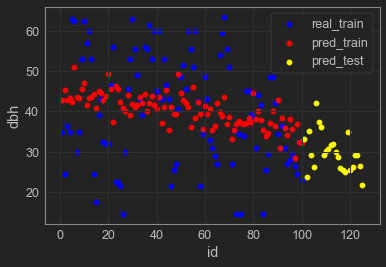

In [14]:
plt.scatter(train_id,target,color="blue",label="real_train")
plt.scatter(train_id,regr.predict(train),color="red",label="pred_train")
plt.scatter(test_id,regr.predict(test),color="yellow",label="pred_test")
plt.ylabel("dbh")
plt.xlabel("id")
plt.legend(loc="upper right")
plt.show()

In [7]:
pred = pd.DataFrame()
pred["Id"] = test_id
pred["dbh"] = predict.round(2)
pred.to_csv("crazy.csv", index=False)